##**Leonardo Theo Valentino Riyanto**
##**202201030**
##**Sistem Informasi A**

In [49]:
import pandas as pd

df = pd.read_csv("/prediksi_pembelian_produk.csv")
df.head()

,ID,Usia,Penghasilan,Status Menikah,Memiliki Rumah,Beli Produk
0,1,Muda,Rendah,Tidak,Tidak,Tidak
1,2,Muda,Rendah,Tidak,Ya,Tidak
2,3,Muda,Sedang,Tidak,Tidak,Ya
3,4,Muda,Tinggi,Ya,Tidak,Ya
4,5,Dewasa,Tinggi,Ya,Tidak,Ya


In [50]:
from sklearn.preprocessing import LabelEncoder

# Salin data untuk pengolahan
data_encoded = df.copy()

# Label encoding untuk data kategorikal
label_encoders = {}
for column in data_encoded.columns:
    if data_encoded[column].dtype == object:
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column])
        label_encoders[column] = le

data_encoded.head()

,ID,Usia,Penghasilan,Status Menikah,Memiliki Rumah,Beli Produk
0,1,1,0,0,0,0
1,2,1,0,0,1,0
2,3,1,1,0,0,1
3,4,1,2,1,0,1
4,5,0,2,1,0,1


In [51]:
# Fitur dan label
X = data_encoded.drop(columns=["Beli Produk", "ID"])
y = data_encoded["Beli Produk"]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [53]:
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8333333333333334

Confusion Matrix:
 [[4 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [54]:
# prediksi manual
sample = pd.DataFrame([{
    "Usia": label_encoders["Usia"].transform(["Muda"])[0],
    "Penghasilan": label_encoders["Penghasilan"].transform(["Tinggi"])[0],
    "Status Menikah": label_encoders["Status Menikah"].transform(["Tidak"])[0],
    "Memiliki Rumah": label_encoders["Memiliki Rumah"].transform(["Ya"])[0],
}])

prediksi = model.predict(sample)[0]
hasil = label_encoders["Beli Produk"].inverse_transform([prediksi])[0]
print("Prediksi Beli Produk:", hasil)

Prediksi Beli Produk: Ya


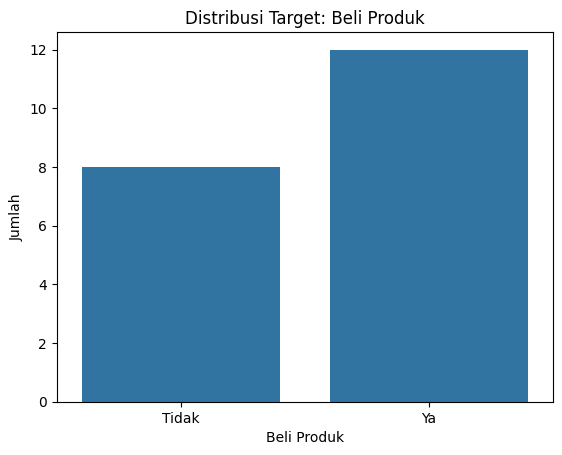

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi label
sns.countplot(x="Beli Produk", data=df)
plt.title("Distribusi Target: Beli Produk")
plt.xlabel("Beli Produk")
plt.ylabel("Jumlah")
plt.show()

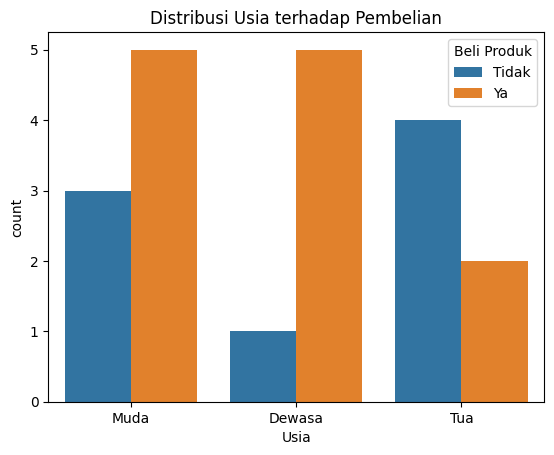

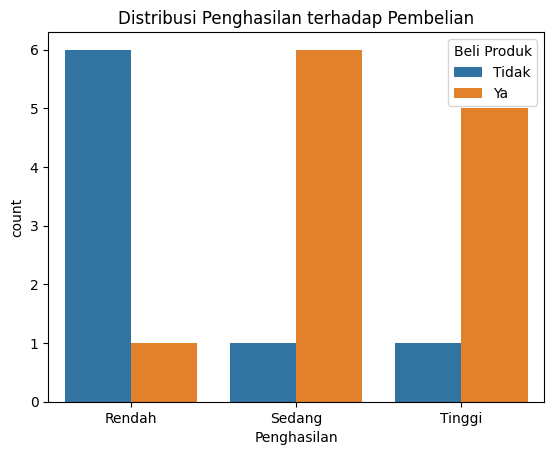

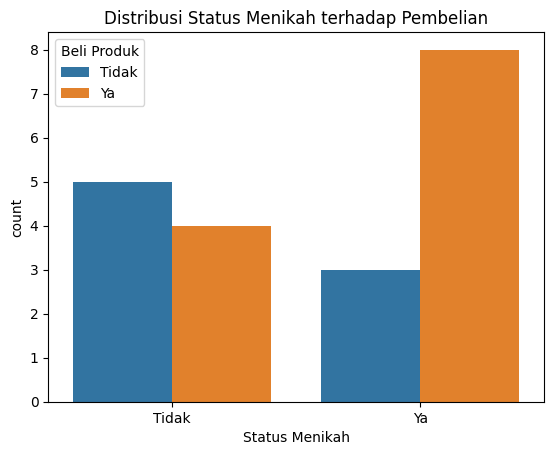

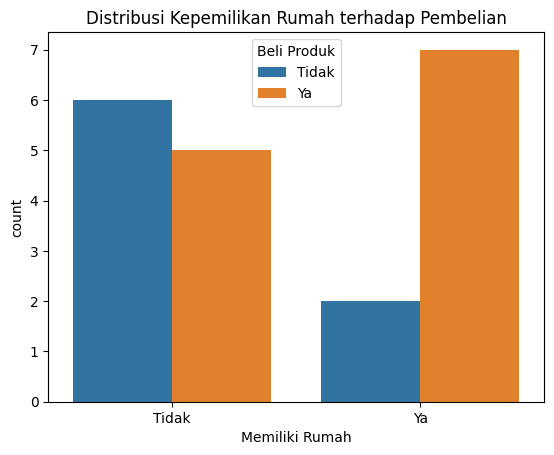

In [56]:
# Visualisasi fitur terhadap target
sns.countplot(x="Usia", hue="Beli Produk", data=df)
plt.title("Distribusi Usia terhadap Pembelian")
plt.show()

sns.countplot(x="Penghasilan", hue="Beli Produk", data=df)
plt.title("Distribusi Penghasilan terhadap Pembelian")
plt.show()

sns.countplot(x="Status Menikah", hue="Beli Produk", data=df)
plt.title("Distribusi Status Menikah terhadap Pembelian")
plt.show()

sns.countplot(x="Memiliki Rumah", hue="Beli Produk", data=df)
plt.title("Distribusi Kepemilikan Rumah terhadap Pembelian")
plt.show()

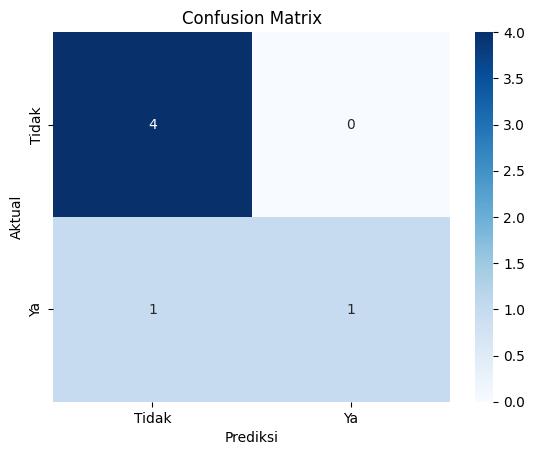

In [57]:
# Heatmap Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoders["Beli Produk"].classes_

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()